<a href="https://colab.research.google.com/github/AngelTroncoso/Gradient_Boosting/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost) 🚀**

## Gradient Boosting (Satisfacción del Cliente) 😊

##1: Instalar XGBoost (si no está instalado):

In [1]:
!pip install xgboost

##2: Cargar los Datos:

In [2]:
import pandas as pd
import io

csv_data = """ID_Cliente,Tiempo_Espera_min,Num_Interacciones,Edad_Cliente,Tipo_Servicio,Satisfaccion_Score
1,5,2,30,Soporte Tecnico,85
2,10,3,45,Ventas,70
3,2,1,25,Informacion,95
4,15,4,50,Soporte Tecnico,60
5,7,2,35,Ventas,80
6,3,1,28,Informacion,90
7,20,5,55,Soporte Tecnico,50
8,8,3,40,Ventas,75
9,4,1,32,Informacion,88
10,12,4,48,Soporte Tecnico,65
11,6,2,33,Ventas,82
12,18,5,60,Soporte Tecnico,55
"""
df = pd.read_csv(io.StringIO(csv_data))
print(df.head())

   ID_Cliente  Tiempo_Espera_min  Num_Interacciones  Edad_Cliente  \
0           1                  5                  2            30   
1           2                 10                  3            45   
2           3                  2                  1            25   
3           4                 15                  4            50   
4           5                  7                  2            35   

     Tipo_Servicio  Satisfaccion_Score  
0  Soporte Tecnico                  85  
1           Ventas                  70  
2      Informacion                  95  
3  Soporte Tecnico                  60  
4           Ventas                  80  


##3: Preprocesamiento (One-Hot Encoding):

In [3]:
df = pd.get_dummies(df, columns=['Tipo_Servicio'], drop_first=True)
print("\nDataFrame después de One-Hot Encoding:")
print(df.head())


DataFrame después de One-Hot Encoding:
   ID_Cliente  Tiempo_Espera_min  Num_Interacciones  Edad_Cliente  \
0           1                  5                  2            30   
1           2                 10                  3            45   
2           3                  2                  1            25   
3           4                 15                  4            50   
4           5                  7                  2            35   

   Satisfaccion_Score  Tipo_Servicio_Soporte Tecnico  Tipo_Servicio_Ventas  
0                  85                           True                 False  
1                  70                          False                  True  
2                  95                          False                 False  
3                  60                           True                 False  
4                  80                          False                  True  


##4: Definir Características (X) y Variable Objetivo (y):

In [4]:
X = df.drop(['ID_Cliente', 'Satisfaccion_Score'], axis=1)
y = df['Satisfaccion_Score']

##5: Dividir Datos (Entrenamiento y Prueba):

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##6: Entrenar Modelo XGBoost:

In [6]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ajusta los parámetros según sea necesario (por ejemplo, n_estimators, learning_rate)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n--- Resultados XGBoost Regressor ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"R^2: {r2_score(y_test, y_pred_xgb):.2f}")

# Importancia de las características
print("\nImportancia de las características:")
for feature, importance in zip(X.columns, xgb_model.feature_importances_):
    print(f"  {feature}: {importance:.4f}")


--- Resultados XGBoost Regressor ---
MSE: 23.28
R^2: 0.70

Importancia de las características:
  Tiempo_Espera_min: 1.0000
  Num_Interacciones: 0.0000
  Edad_Cliente: 0.0000
  Tipo_Servicio_Soporte Tecnico: 0.0000
  Tipo_Servicio_Ventas: 0.0000


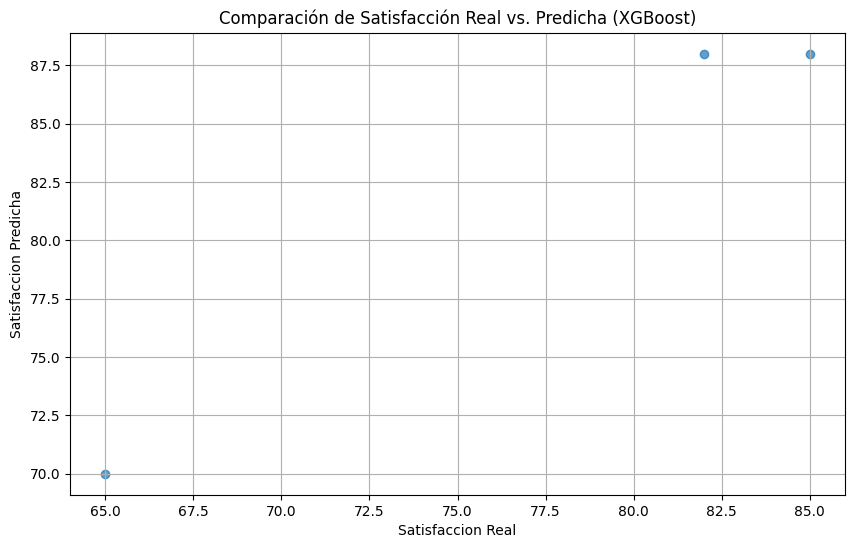

In [9]:
import matplotlib.pyplot as plt

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.xlabel("Satisfaccion Real")
plt.ylabel("Satisfaccion Predicha")
plt.title("Comparación de Satisfacción Real vs. Predicha (XGBoost)")
plt.grid(True)
plt.show()